In [1]:
import numpy as np

In [2]:
# Generate Training data
from scipy.stats import multivariate_normal
def X_data_generation(r, samples, features):
    a = np.zeros((features, features))
    b = a.copy()
    
    for i in range(features):
        a[i, :] = i + 1
    
    for j in range(features):
        b[:, j] = j + 1
    
    dc = r**np.abs(a - b)
    mean_vector = np.zeros(dc.shape[0])
    X = multivariate_normal.rvs(mean=mean_vector, cov=dc, size=samples)
    
    return X

def beta_initiate(features):
    s = np.concatenate((np.linspace(1, 2.9, features), np.linspace(-2.9, -1, features)))
    theta = np.matrix(np.random.choice(s, size=features)).T
    theta[4, 0] = 1.1
    
    return theta

def Y_data_generation(X, beta):
    ebr = np.random.normal(0, 1, size=(X.shape[0],1))
    Y = X@beta + ebr
    return Y

In [3]:
# generate training data
r = 0.5
samples = 10
features = 20

X = X_data_generation(r, samples, features)
init_beta = beta_initiate(features)
y = Y_data_generation(X, init_beta)

In [4]:
init_beta.shape,X.shape,y.shape

((20, 1), (10, 20), (10, 1))

In [5]:

class LassoReg():
    def __init__(self,X,intercept=True,lam = 10**np.linspace(-6, 3, num=300, endpoint=True)):
        self.p = X.shape[1]
        self.n = X.shape[0]
        self.intercept = intercept
        self.lam = lam
        
    def design_matrix(self,X,y):
        if self.intercept:
            ones = np.ones((X.shape[0],1))
            X = np.hstack([ones, X])
        y = y.reshape((-1,1))
        return X,y
    
    def fit(self, X, y):
        X, y = self.design_matrix(X,y)
        self.beta_rec = np.zeros((len(self.lam),X.shape[1]))
        self.mse_rec = np.zeros((len(self.lam),1))
        for i, l in enumerate(self.lam):
            beta_hat = np.linalg.inv(X.T@X+ l*np.identity(self.p))@(X.T@y)
            y_hat = X@beta_hat
            mse = np.mean(np.power((y_hat-y),2))
            
            self.beta_rec[i,:] = beta_hat.reshape(len(beta_hat))
            self.mse_rec[i] = mse
        

In [6]:
Ls = LassoReg(X,intercept = False)
Ls.fit(X,y)

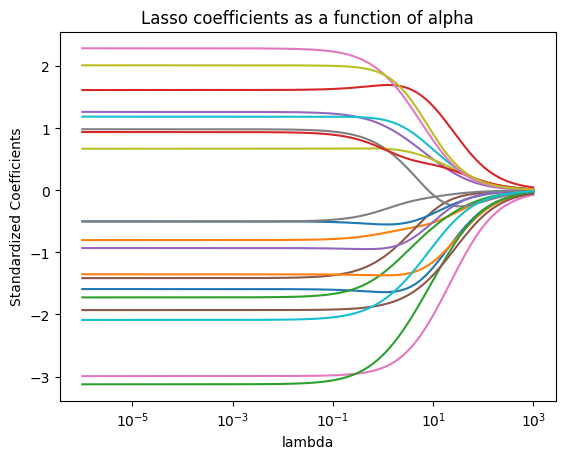

In [7]:
import matplotlib.pyplot as plt
ax = plt.gca()

ax.plot(Ls.lam, Ls.beta_rec)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [8]:
lambd = 10**np.linspace(-9, 2, num=300, endpoint=True)
Ls = LassoReg(X,intercept = False,lam = lambd)
Ls.fit(X,y)

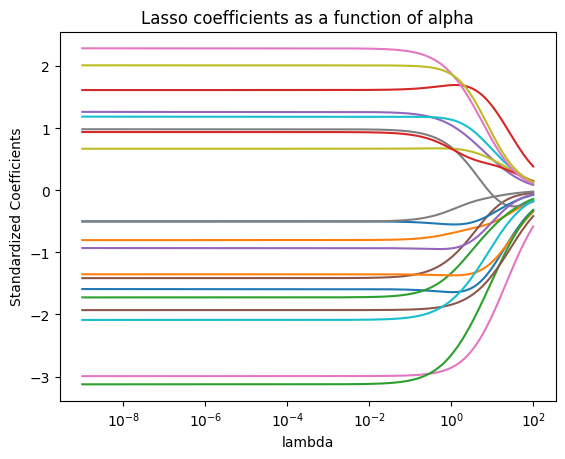

In [9]:
import matplotlib.pyplot as plt
ax = plt.gca()

ax.plot(Ls.lam, Ls.beta_rec)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [10]:
# find the optimal coefficients
optIndex = np.argmin(Ls.mse_rec)
opt_beta = Ls.beta_rec[optIndex,:]
print("the best coeffcients:\n", opt_beta)
print("the optimal lambda:\n", Ls.lam[optIndex])

the best coeffcients:
 [-1.59092638 -0.80229978 -1.72525616  1.61472329  1.26296237 -1.41485128
 -2.99341586  0.98350295  0.6691086   1.18619594 -0.50008184 -1.3527599
 -3.12532285  0.93842349 -0.93017016 -1.92991471  2.28677197 -0.50367083
  2.01315728 -2.08832422]
the optimal lambda:
 8.909078300934143e-08


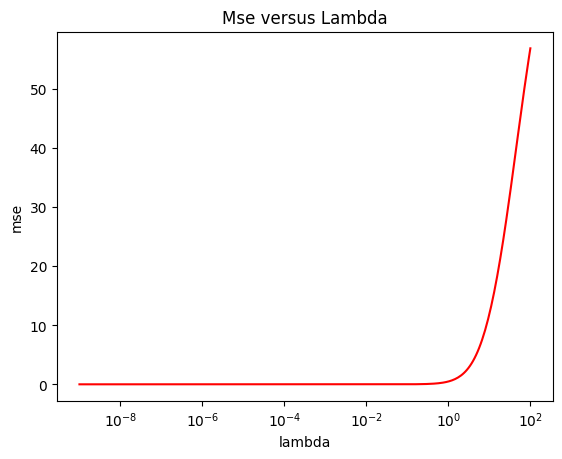

In [11]:
ax = plt.gca()
ax.set_xscale('log')
plt.plot(Ls.lam,Ls.mse_rec,c="red")
plt.xlabel('lambda')
plt.ylabel('mse')
plt.title('Mse versus Lambda')
plt.show()